In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score,
    confusion_matrix, 
    classification_report,
    roc_auc_score,
    roc_curve
)

# Model persistence
import joblib

# Model selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [43]:
# Load the cleaned dataset that Person A created
df = pd.read_csv('../data/raw/new_all_cleaned_train.csv')

print("--- Dataset Loaded ---")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
display(df.head())

--- Dataset Loaded ---
Shape: (614, 17)
Columns: ['Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Loan_Status_NUM', 'Total_Income', 'LoanAmount_Log', 'Total_Income_Log', 'Loan_to_Income_Ratio', 'Gender_Male', 'Married_Yes', 'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Not Graduate', 'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban']


,Loan_Amount_Term,Credit_History,Loan_Status,Loan_Status_NUM,Total_Income,LoanAmount_Log,Total_Income_Log,Loan_to_Income_Ratio,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,360.0,1.0,1,1,5849.0,4.852030,8.674026,0.021884,True,False,False,False,False,False,False,False,True
1,360.0,1.0,0,0,6091.0,4.852030,8.714568,0.021015,True,True,True,False,False,False,False,False,False
2,360.0,1.0,1,1,3000.0,4.189655,8.006368,0.022000,True,True,False,False,False,False,True,False,True
3,360.0,1.0,1,1,4941.0,4.787492,8.505323,0.024287,True,True,False,False,False,True,False,False,True
4,360.0,1.0,1,1,6000.0,4.948760,8.699515,0.023500,True,False,False,False,False,False,False,False,True


In [44]:
columns_to_drop = []

# Drop BOTH Loan_Status columns (text and numeric from features)
if 'Loan_Status' in df.columns:
    columns_to_drop.append('Loan_Status')

# Create feature matrix (X) and target (y)
y = df['Loan_Status_NUM'].copy()  # Target variable
X = df.drop(columns=columns_to_drop + ['Loan_Status_NUM'], axis=1)  

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y 
)

print("--- Data Split Complete ---")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")
print(f"Number of features: {X_train.shape[1]}")

--- Data Split Complete ---
Training samples: 491
Testing samples: 123
Number of features: 15


In [45]:
# Standardize features (mean=0, std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("--- Feature Scaling Complete ---")
print(f"Training data scaled shape: {X_train_scaled.shape}")
print(f"Testing data scaled shape: {X_test_scaled.shape}")

--- Feature Scaling Complete ---
Training data scaled shape: (491, 15)
Testing data scaled shape: (123, 15)


In [46]:
# Define exactly 3 models as required
models = {
    "Naïve Bayes": GaussianNB(),
    
    "Decision Tree (Entropy)": DecisionTreeClassifier(
        criterion='entropy',  
        max_depth=5,          
        min_samples_split=20,
        random_state=42
    ),
    
    "ANN (Neural Network)": MLPClassifier(
        hidden_layer_sizes=(100, 50),  # 2 hidden layers: 100 neurons, then 50
        activation='relu',             # Activation function
        solver='adam',                 # Optimizer
        max_iter=2000,                # More iterations for convergence
        random_state=42,
        early_stopping=True,          # Stop if no improvement
        validation_fraction=0.1       # Use 10% of training data for validation
    )
}




MODEL TRAINING & EVALUATION


Training: Naïve Bayes
Performance Metrics:
  Accuracy:  0.8699 (86.99%)
  Precision: 0.8557
  Recall:    0.9765
  F1-Score:  0.9121
  ROC-AUC:   0.8545

 Confusion Matrix:
  True Negatives (TN):  24
  False Positives (FP): 14
  False Negatives (FN): 2  DANGEROUS FOR BANKS
  True Positives (TP):  83


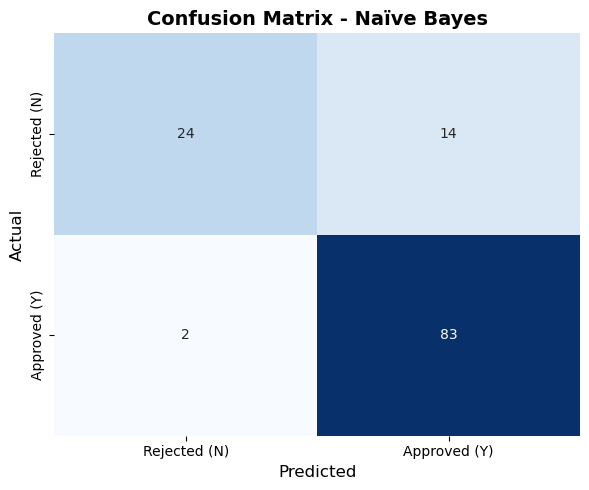

----------------------------------------------------------------------

Training: Decision Tree (Entropy)
Performance Metrics:
  Accuracy:  0.8699 (86.99%)
  Precision: 0.8791
  Recall:    0.9412
  F1-Score:  0.9091
  ROC-AUC:   0.8794

 Confusion Matrix:
  True Negatives (TN):  27
  False Positives (FP): 11
  False Negatives (FN): 5  DANGEROUS FOR BANKS
  True Positives (TP):  80


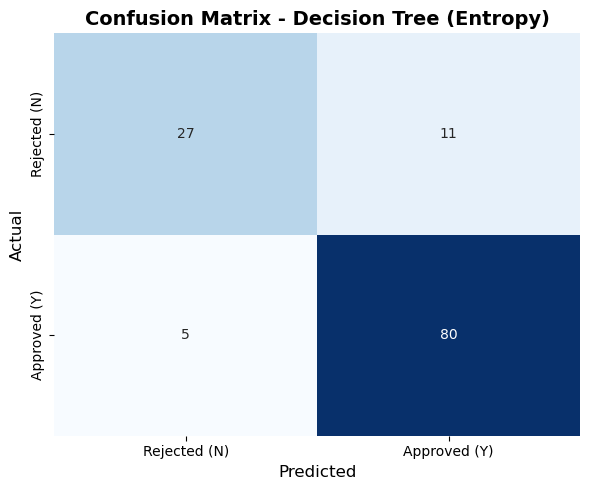

----------------------------------------------------------------------

Training: ANN (Neural Network)
Performance Metrics:
  Accuracy:  0.8049 (80.49%)
  Precision: 0.7850
  Recall:    0.9882
  F1-Score:  0.8750
  ROC-AUC:   0.7861

 Confusion Matrix:
  True Negatives (TN):  15
  False Positives (FP): 23
  False Negatives (FN): 1  DANGEROUS FOR BANKS
  True Positives (TP):  84


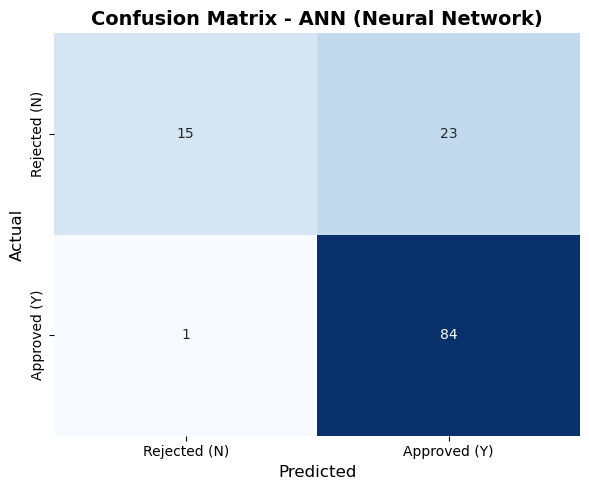

----------------------------------------------------------------------


In [47]:
# Store results for comparison
results = []

print("\n" + "="*70)
print("MODEL TRAINING & EVALUATION")
print("="*70 + "\n")

for name, model in models.items():
    print(f"\n{'='*70}")
    print(f"Training: {name}")
    print(f"{'='*70}")
    
    # TRAIN THE MODEL
    model.fit(X_train_scaled, y_train)
    
    # MAKE PREDICTIONS
    y_pred = model.predict(X_test_scaled)
    
    # Get probability predictions (for ROC-AUC)
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_pred_proba = None
    
    # CALCULATE METRICS
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # ROC-AUC (only if probabilities available)
    if y_pred_proba is not None:
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        roc_auc = None
    
    # CONFUSION MATRIX
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    # PRINT RESULTS
    print(f"Performance Metrics:")
    print(f"  Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")
    if roc_auc:
        print(f"  ROC-AUC:   {roc_auc:.4f}")
    
    print(f"\n Confusion Matrix:")
    print(f"  True Negatives (TN):  {tn}")
    print(f"  False Positives (FP): {fp}")
    print(f"  False Negatives (FN): {fn}  DANGEROUS FOR BANKS")
    print(f"  True Positives (TP):  {tp}")
    
    #  VISUALIZE CONFUSION MATRIX
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Rejected (N)', 'Approved (Y)'],
                yticklabels=['Rejected (N)', 'Approved (Y)'])
    plt.title(f'Confusion Matrix - {name}', fontsize=14, fontweight='bold')
    plt.ylabel('Actual', fontsize=12)
    plt.xlabel('Predicted', fontsize=12)
    plt.tight_layout()
    plt.show()
    
    # STORE RESULTS
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'False_Negatives': fn,
        'False_Positives': fp
    })
    
    print("-" * 70)


In [52]:
# Create comparison DataFrame
results_df = pd.DataFrame(results)

# Sort by F1-Score (balanced metric)
results_df = results_df.sort_values('F1-Score', ascending=False)

print("\n" + "="*80)
print(" MODEL COMPARISON TABLE")
print("="*80)
display(results_df.style.highlight_max(subset=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'], color='blue'))

# Save to CSV
results_df.to_csv('model_comparison.csv', index=False)
print("\n Comparison table saved to 'model_comparison.csv'")


 MODEL COMPARISON TABLE


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC,False_Negatives,False_Positives
0,Naïve Bayes,0.869919,0.855670,0.976471,0.912088,0.854489,2,14
1,Decision Tree (Entropy),0.869919,0.879121,0.941176,0.909091,0.879412,5,11
2,ANN (Neural Network),0.804878,0.785047,0.988235,0.875000,0.786068,1,23



 Comparison table saved to 'model_comparison.csv'


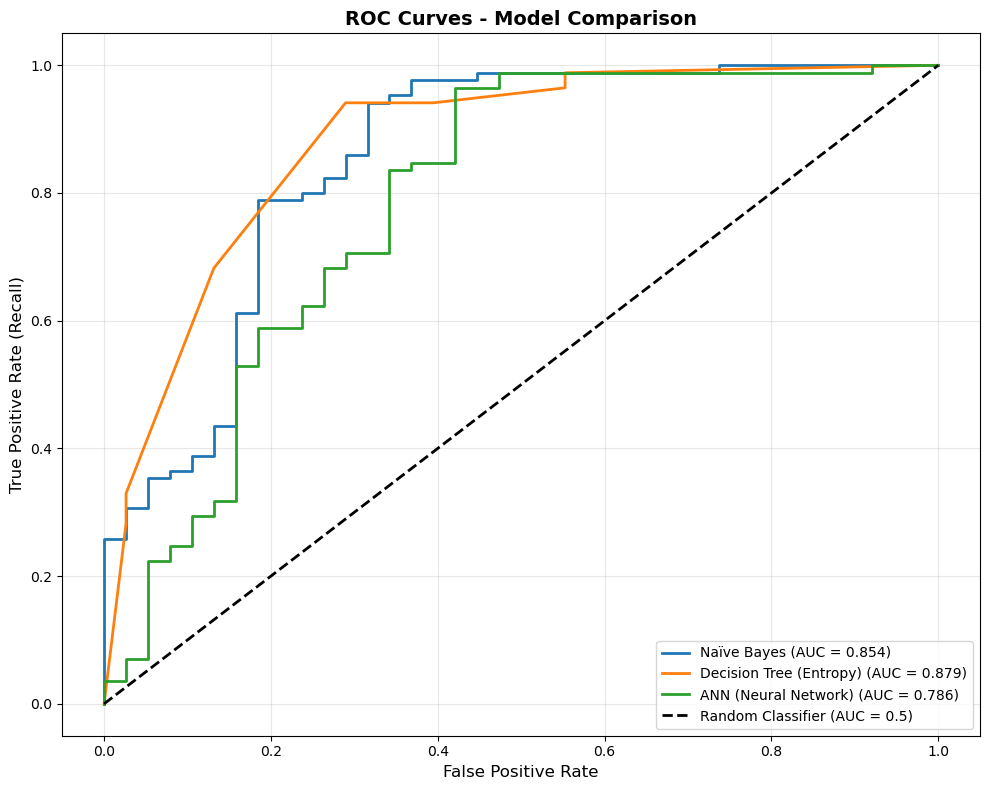

In [49]:
# Plot ROC curves for comparison
plt.figure(figsize=(10, 8))

for name, model in models.items():
    if hasattr(model, 'predict_proba'):
        # Get probability predictions
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
        
        # Calculate ROC curve
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        auc = roc_auc_score(y_test, y_pred_proba)
        
        # Plot
        plt.plot(fpr, tpr, linewidth=2, label=f'{name} (AUC = {auc:.3f})')

# Plot diagonal (random classifier)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier (AUC = 0.5)')

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.title('ROC Curves - Model Comparison', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [50]:
# Show FN comparison
print("\nFalse Negative Comparison:")
fn_comparison = results_df[['Model', 'False_Negatives', 'Recall']].sort_values('False_Negatives')
display(fn_comparison)


False Negative Comparison:


,Model,False_Negatives,Recall
2,ANN (Neural Network),1,0.988235
0,Naïve Bayes,2,0.976471
1,Decision Tree (Entropy),5,0.941176


In [51]:
import os
# Select best model based on F1-Score (or you can use Recall)
best_model_idx = results_df['F1-Score'].idxmax()
best_model_name = results_df.loc[best_model_idx, 'Model']
best_model = models[best_model_name]

print("\n" + "="*80)
print(" BEST MODEL SELECTION")
print("="*80)
print(f"\nBest Model: {best_model_name}")
print(f"F1-Score: {results_df.loc[best_model_idx, 'F1-Score']:.4f}")
print(f"Accuracy: {results_df.loc[best_model_idx, 'Accuracy']:.4f}")
print(f"Recall: {results_df.loc[best_model_idx, 'Recall']:.4f}")
print(f"False Negatives: {int(results_df.loc[best_model_idx, 'False_Negatives'])}")

# Optional: Retrain on full dataset for production
print("\n🔄 Retraining on full dataset...")
X_full_scaled = scaler.fit_transform(X)
best_model.fit(X_full_scaled, y)

# Define save paths (go up one level from notebooks folder)
model_save_path = '../loan_model.pkl'
scaler_save_path = '../scaler.pkl'

# Save the model
joblib.dump(best_model, model_save_path)


# Save the scaler (CRITICAL for Streamlit deployment)
joblib.dump(scaler, scaler_save_path)




 BEST MODEL SELECTION

Best Model: Naïve Bayes
F1-Score: 0.9121
Accuracy: 0.8699
Recall: 0.9765
False Negatives: 2

🔄 Retraining on full dataset...


['../scaler.pkl']